Author: Emily Wong \
Last updated: August 30, 2024

In [2]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import scipy
from scipy.stats import ttest_ind, ttest_1samp, f_oneway

# Bias Measures

In [4]:
PHQ9_orig = pd.read_excel("PHQ9_orig_results.xlsx")
PHQ9_boot = pd.read_excel("PHQ9_boot_test_results.xlsx")
PHQ9_cv = pd.read_excel("PHQ9_repeat_results.xlsx")
EPDS_orig = pd.read_excel("EPDS_orig_results.xlsx")
EPDS_boot = pd.read_excel("EPDS_boot_test_results.xlsx")
EPDS_cv = pd.read_excel("EPDS_repeat_results.xlsx")

In [5]:
PHQ9_orig['Scale'] = 'PHQ9'
PHQ9_cv['Scale'] = 'PHQ9'
PHQ9_boot['Scale'] = 'PHQ9'
EPDS_orig['Scale'] = 'EPDS'
EPDS_boot['Scale'] = 'EPDS'
EPDS_cv['Scale'] = 'EPDS'

In [6]:
all_orig = pd.concat([PHQ9_orig,EPDS_orig],axis=0)
del all_orig[all_orig.columns[0]]

all_boot = pd.concat([PHQ9_boot,EPDS_boot],axis=0)
del all_boot[all_boot.columns[0]]

all_cv = pd.concat([PHQ9_cv,EPDS_cv],axis=0)
del all_cv[all_cv.columns[0]]

In [7]:
all_orig['Race'] = all_orig['Race'].str[9:]
all_boot['Race'] = all_boot['Race'].str[9:]
all_cv['Race'] = all_cv['Race'].str[9:]

In [8]:
all_orig['Race'] = all_orig['Race'].replace({'Asian or Native Hawaiian or Other Pacific Islander':'AAPI',
                                             'Black or African American':'Black',
                                             'Multiracial':'Multi',
                                             'Hispanic White':'Hispanic'})

all_boot['Race'] = all_boot['Race'].replace({'Asian or Native Hawaiian or Other Pacific Islander':'AAPI',
                                             'Black or African American':'Black',
                                             'Multiracial':'Multi',
                                             'Hispanic White':'Hispanic'})

all_cv['Race'] = all_cv['Race'].replace({'Asian or Native Hawaiian or Other Pacific Islander':'AAPI',
                                         'Black or African American':'Black',
                                         'Multiracial':'Multi',
                                         'Hispanic White':'Hispanic'})

In [9]:
all_orig['Model'] = all_orig['Model'].replace({'RF Model':'RF'})
all_boot['Model'] = all_boot['Model'].replace({'RF Model':'RF'})
all_cv['Model'] = all_cv['Model'].replace({'RF Model':'RF'})

In [10]:
races = all_cv.Race.unique()

## Boostrap

In [12]:
dat_diff_boot = all_boot[all_boot['Race']!='White']

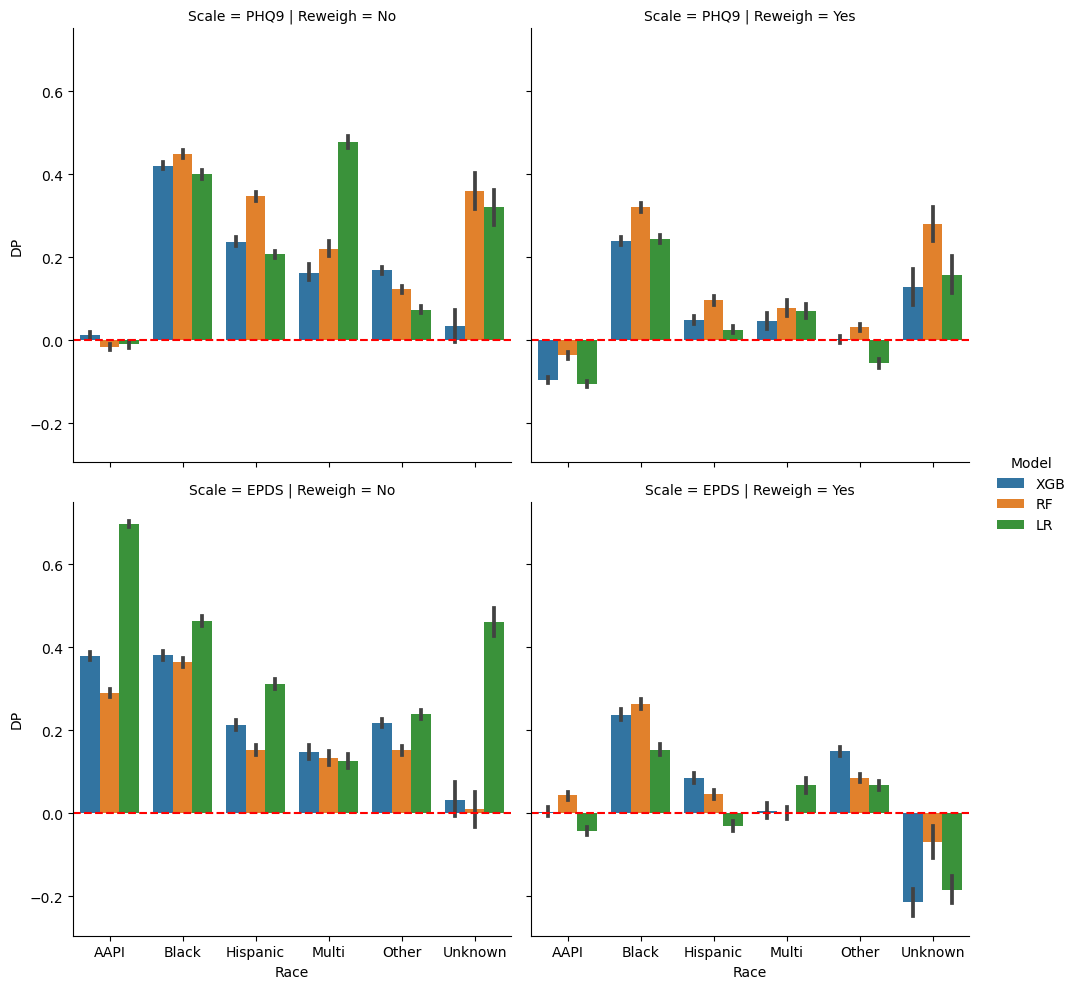

In [13]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['DP'].notnull()], x='Race', y='DP', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('DP (boot).pdf',format='pdf',dpi=600)

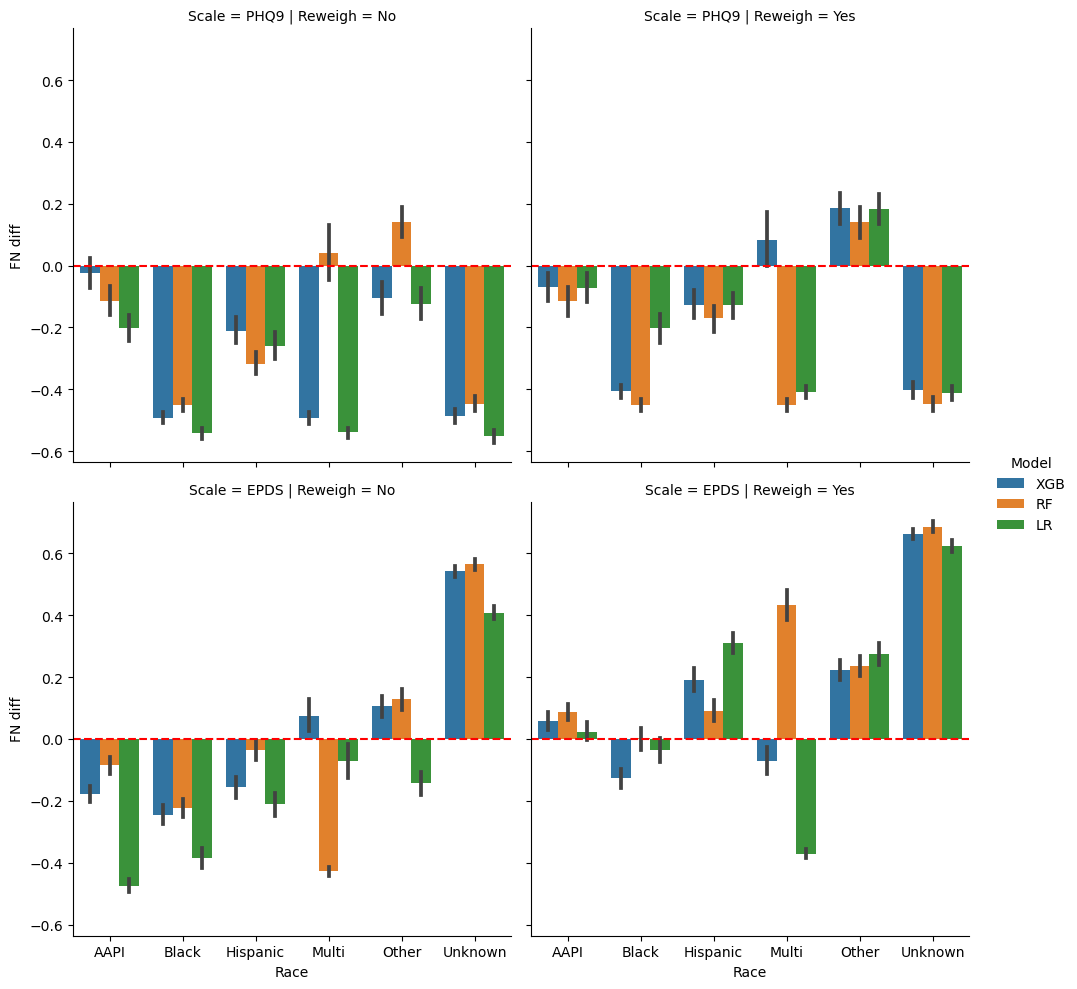

In [14]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['FN diff'].notnull()], x='Race', y='FN diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FN diff (boot).pdf',format='pdf',dpi=600)

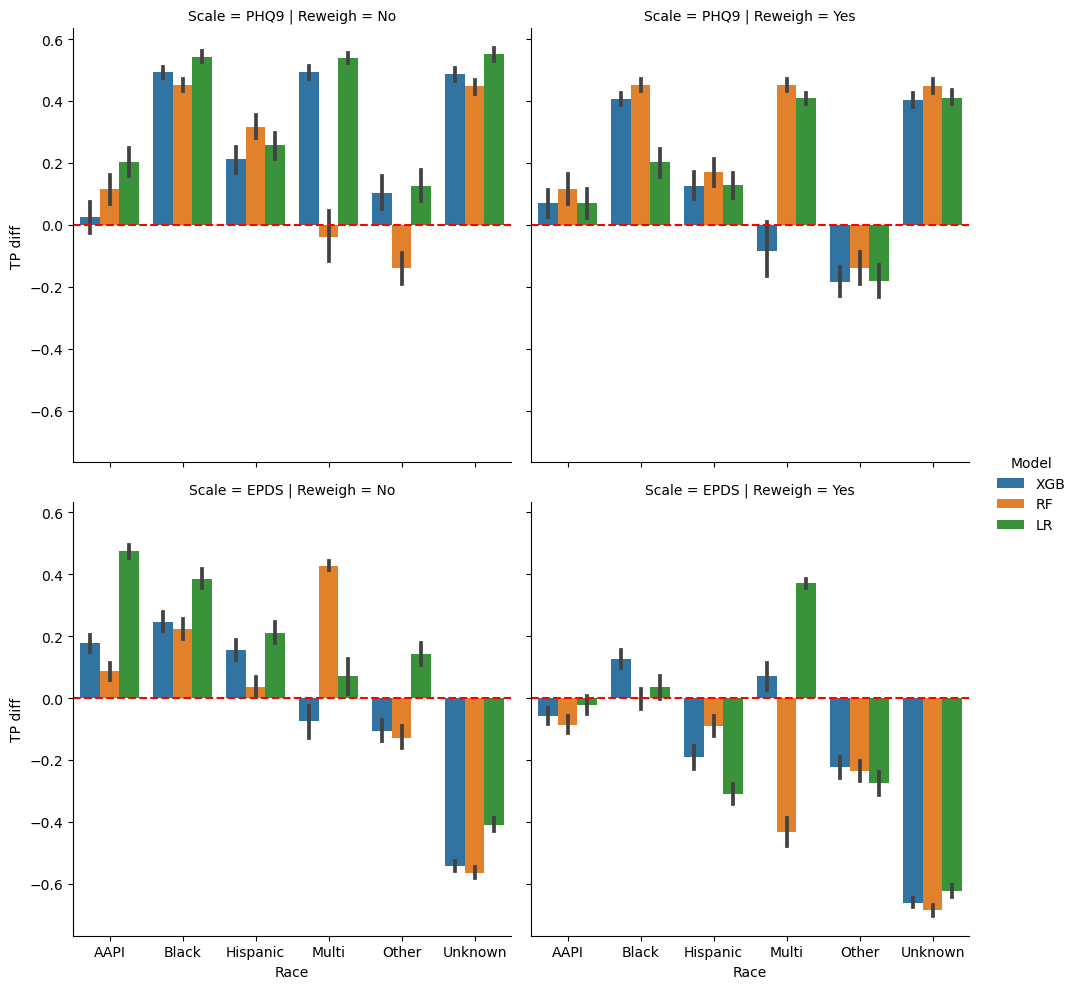

In [15]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['TP diff'].notnull()], x='Race', y='TP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('TP diff (boot).pdf',format='pdf',dpi=600)

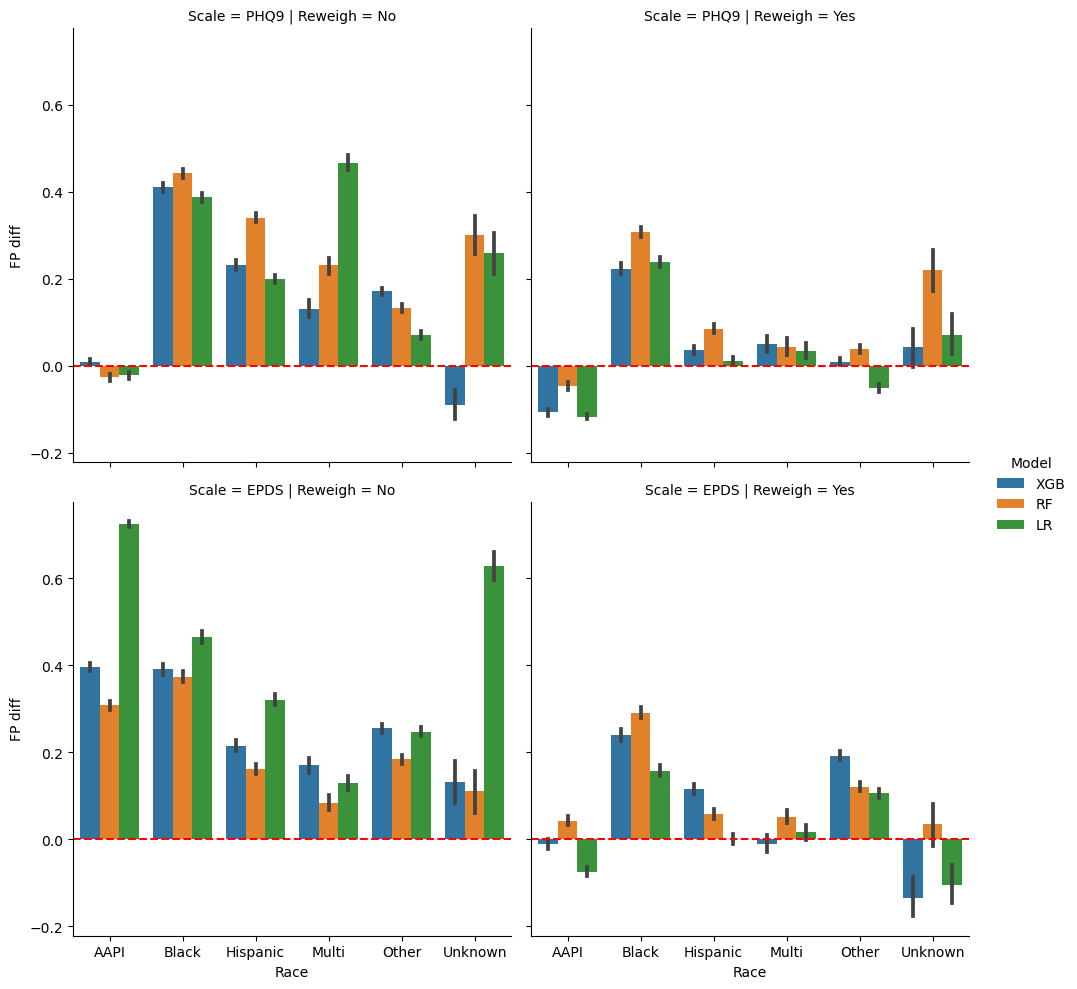

In [16]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['FP diff'].notnull()], x='Race', y='FP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FP diff (boot).pdf',format='pdf',dpi=600)

## Cross Validation

In [18]:
dat_diff_cv = all_cv[all_cv['Race']!='White']

In [19]:
print('*** DEMOGRAPHIC PARITY *** \n')

print('One sample t-test (no reweigh):')
one_samp = ttest_1samp(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['DP'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['DP'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('One sample t-test (reweigh):')
one_samp = ttest_1samp(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['DP'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['DP'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('Two sample t-test:')
two_samp = ttest_ind(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['DP'].notnull()],
                     dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['DP'].notnull()],
                     equal_var=False)
print(two_samp)
print(two_samp.confidence_interval(confidence_level=0.95))

*** DEMOGRAPHIC PARITY *** 

One sample t-test (no reweigh):
Mean 0.2377315933697924
ConfidenceInterval(low=0.2310660379253747, high=0.24439714881421012)
TtestResult(statistic=69.92697260407404, pvalue=0.0, df=3599) 

One sample t-test (reweigh):
Mean 0.02150943384957476
ConfidenceInterval(low=0.017480716005781292, high=0.025538151693368226)
TtestResult(statistic=10.46782124790281, pvalue=2.7909319197435244e-25, df=3599) 

Two sample t-test:
TtestResult(statistic=54.43051750145402, pvalue=0.0, df=5918.90437063034)
ConfidenceInterval(low=0.20843472072477714, high=0.22400959831565814)


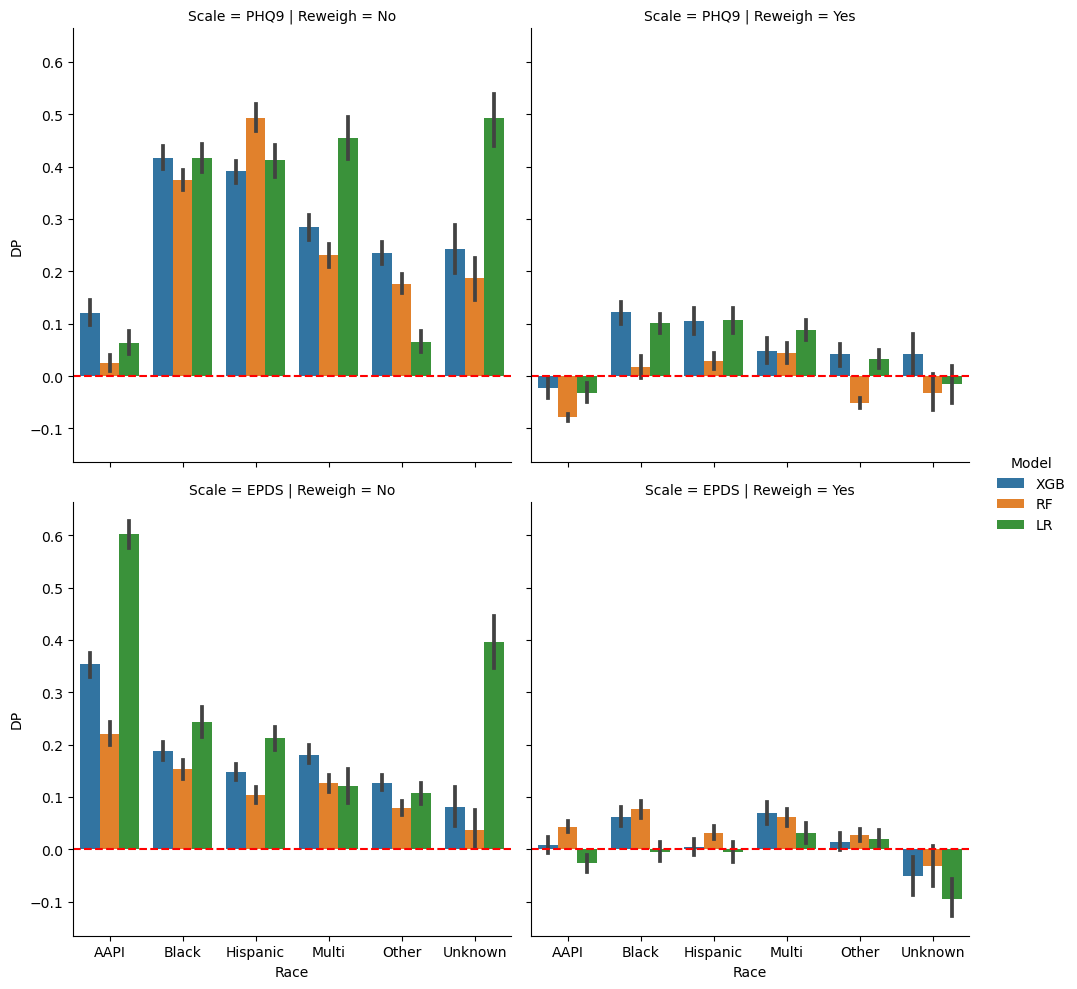

In [20]:
fig = sns.catplot(data=dat_diff_cv[(dat_diff_cv['DP'].notnull())], x='Race', y='DP', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('DP (cv).pdf',format='pdf',dpi=600)

In [21]:
print('*** FALSE NEGATIVE DIFF *** \n')

print('One sample t-test (no reweigh):')
one_samp = ttest_1samp(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['FN diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['FN diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('One sample t-test (reweigh):')
one_samp = ttest_1samp(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['FN diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['FN diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('Two sample t-test:')
two_samp = ttest_ind(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['FN diff'].notnull()],
                     dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['FN diff'].notnull()],
                     equal_var=False)
print(two_samp)
print(two_samp.confidence_interval(confidence_level=0.95))

*** FALSE NEGATIVE DIFF *** 

One sample t-test (no reweigh):
Mean -0.18418522709876828
ConfidenceInterval(low=-0.19460654979487557, high=-0.17376390440266098)
TtestResult(statistic=-34.652771137875106, pvalue=5.944856894901225e-225, df=3329) 

One sample t-test (reweigh):
Mean 0.017976193277377026
ConfidenceInterval(low=0.008308867087587261, high=0.02764351946716679)
TtestResult(statistic=3.645838080271509, pvalue=0.00027059829184425356, df=3329) 

Two sample t-test:
TtestResult(statistic=-27.884501005682523, pvalue=6.901578595584848e-162, df=6620.7964259131295)
ConfidenceInterval(low=-0.21637367225015575, high=-0.1879491685021349)


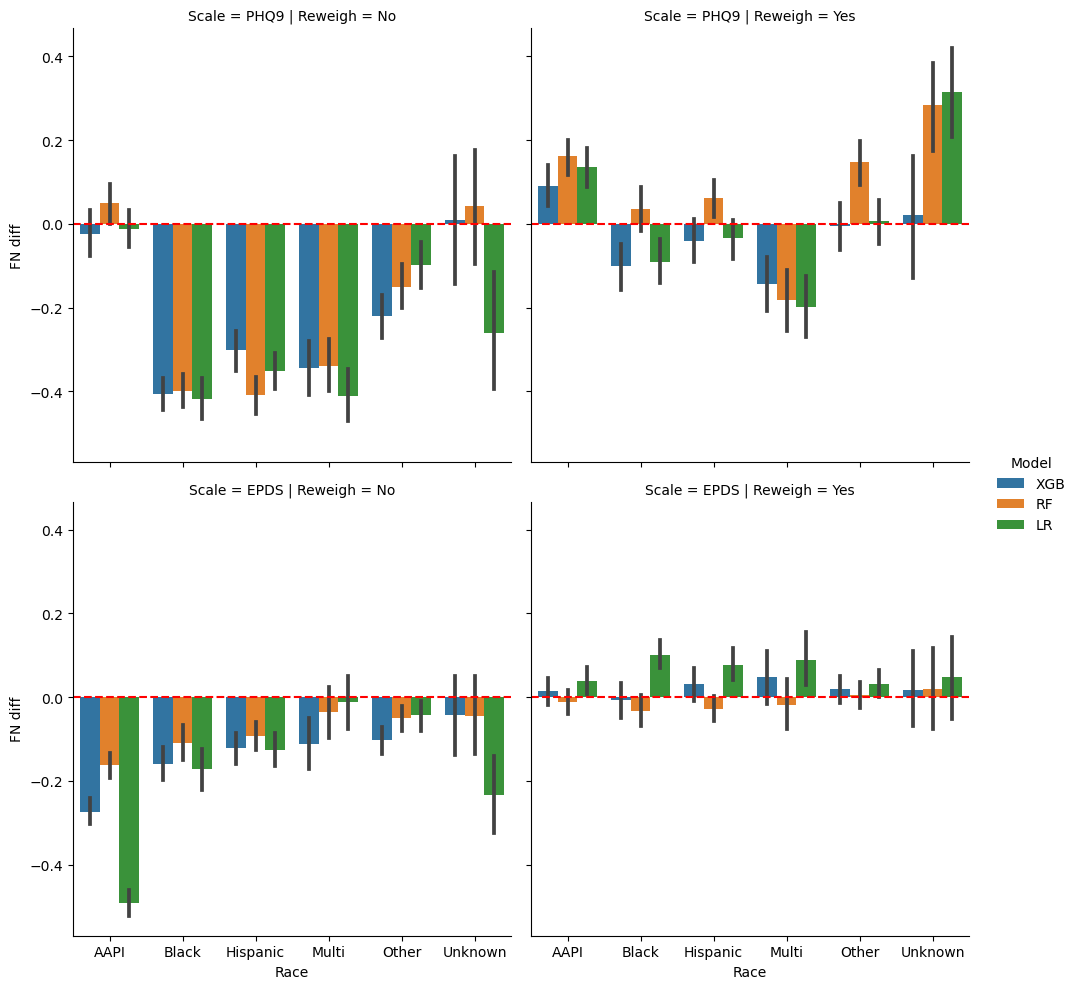

In [22]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['FN diff'].notnull()], x='Race', y='FN diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FN diff (cv).pdf',format='pdf',dpi=600)

In [23]:
print('*** TP DIFF *** \n')

one_samp = ttest_1samp(dat_diff_cv['TP diff'][dat_diff_cv['TP diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['TP diff'][dat_diff_cv['TP diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

*** TP DIFF *** 

Mean 0.08310451691069562
ConfidenceInterval(low=0.0755954780543442, high=0.09061355576704704)
TtestResult(statistic=21.695382660778634, pvalue=6.624309771647845e-101, df=6659) 



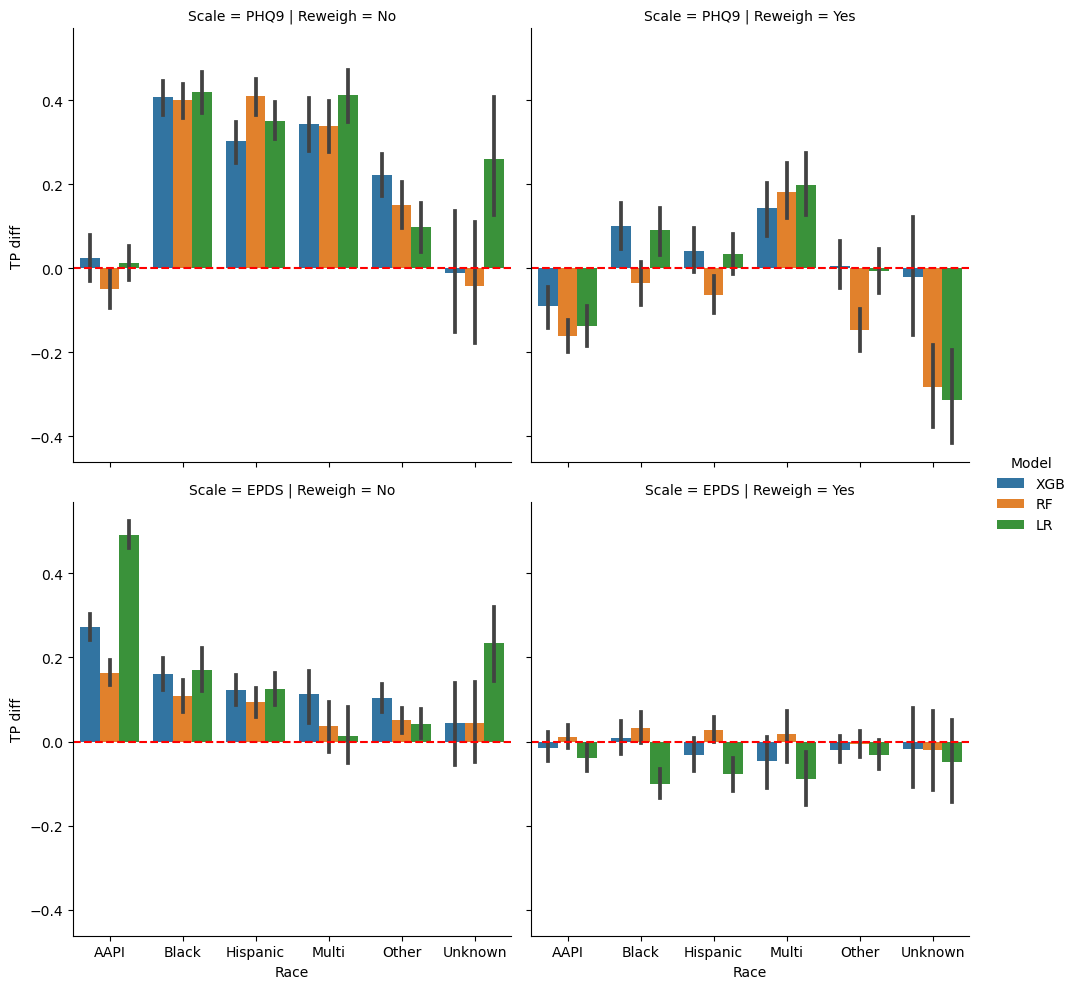

In [24]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['TP diff'].notnull()], x='Race', y='TP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('TP diff (cv).pdf',format='pdf',dpi=600)

In [25]:
print('*** FP DIFF *** \n')

one_samp = ttest_1samp(dat_diff_cv['FP diff'][dat_diff_cv['FP diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['FP diff'][dat_diff_cv['FP diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

*** FP DIFF *** 

Mean 0.1287164227461937
ConfidenceInterval(low=0.12396070003369908, high=0.1334721454586883)
TtestResult(statistic=53.05649439983636, pvalue=0.0, df=7199) 



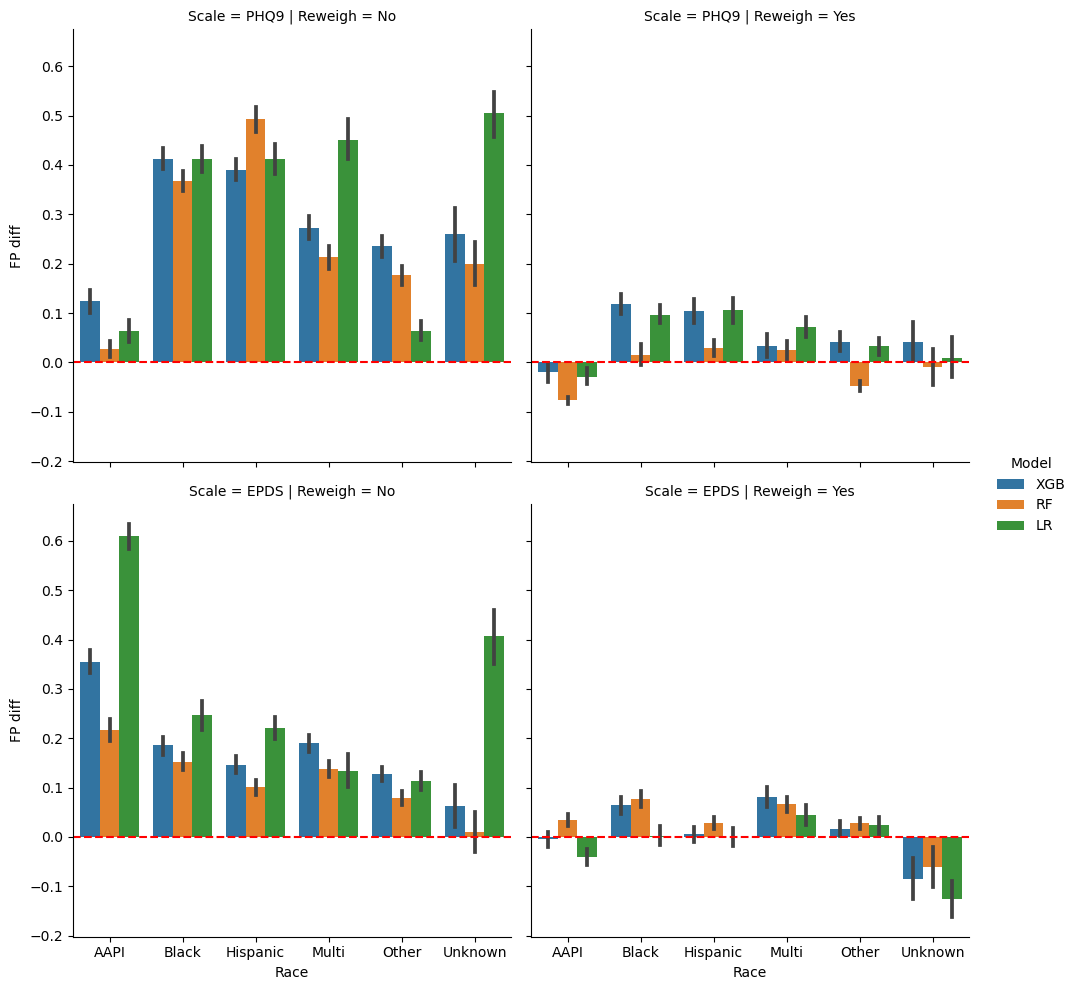

In [26]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['FP diff'].notnull()], x='Race', y='FP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FP diff (cv).pdf',format='pdf',dpi=600)

In [27]:
print('*** TEST AUC DIFF *** \n')

one_samp = ttest_1samp(dat_diff_cv['Test AUC diff'][dat_diff_cv['Test AUC diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['Test AUC diff'][dat_diff_cv['Test AUC diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

*** TEST AUC DIFF *** 

Mean -0.019844444444444442
ConfidenceInterval(low=-0.024001856019526806, high=-0.01568703286936208)
TtestResult(statistic=-9.357136419093221, pvalue=1.0968745823305027e-20, df=6659) 



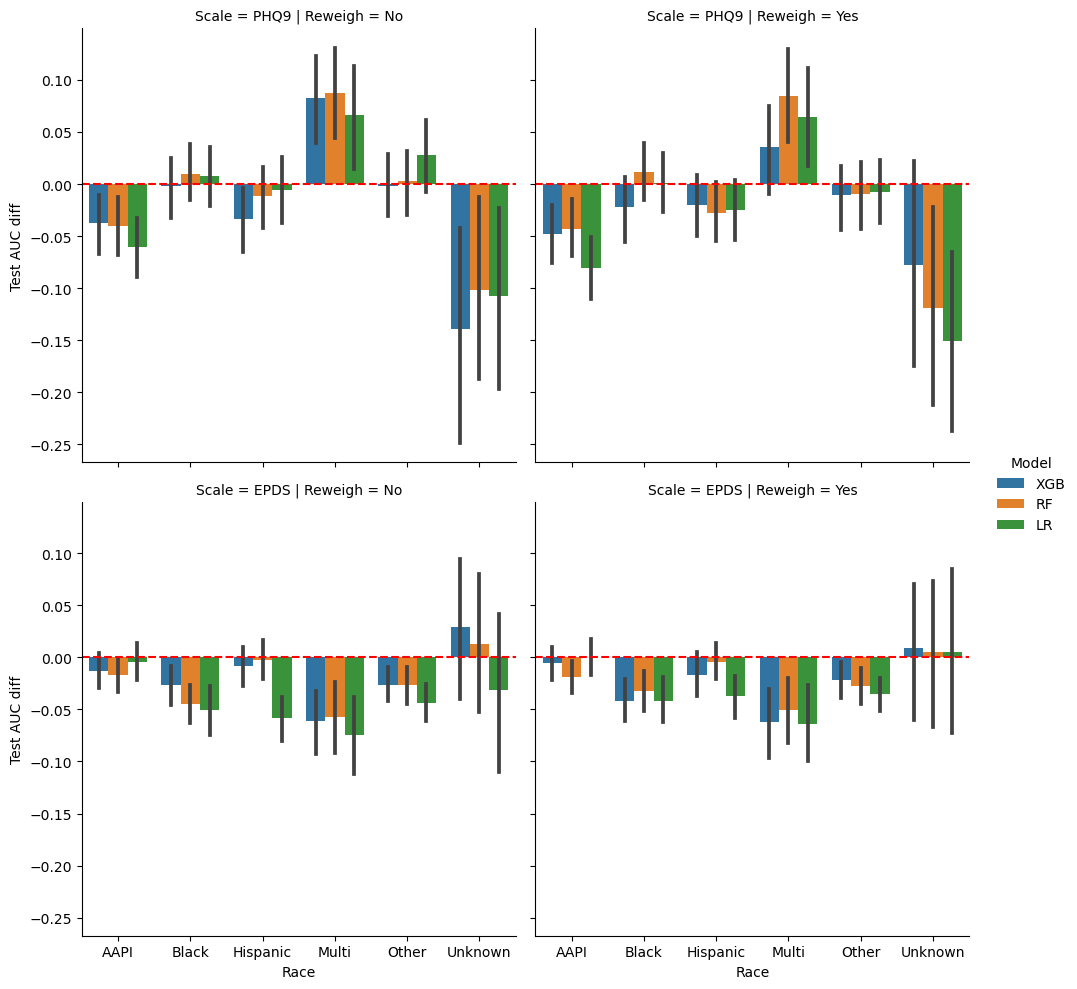

In [28]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['Test AUC diff'].notnull()], x='Race', y='Test AUC diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('AUC diff by Race (cv).pdf',format='pdf',dpi=600)

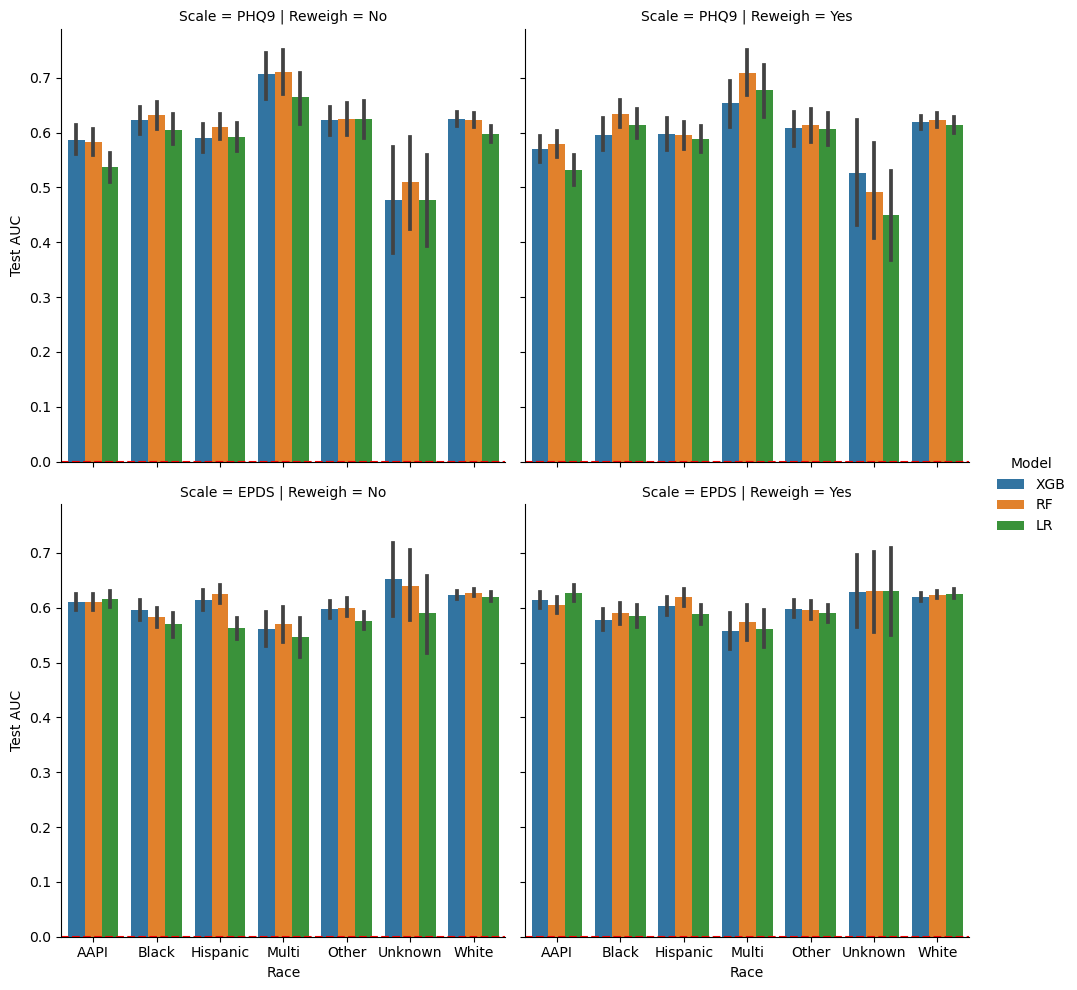

In [29]:
fig = sns.catplot(data=all_cv[all_cv['Test AUC'].notnull()], x='Race', y='Test AUC', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('AUC by Race (cv).pdf',format='pdf',dpi=600)

# Overall Test AUC and Balanced Accuracy

## Boostrap AUC and Balanced Accuracy

In [32]:
uniq_results = all_boot.iloc[::len(races)]

In [33]:
summary = pd.DataFrame()
summary = pd.DataFrame(uniq_results.groupby(['Model','Reweigh','Scale'])['Overall Test AUC'].agg(['min','max','mean','count','std']))
summary['se'] = summary['std']/np.sqrt(summary['count'])
summary['ci_low'] = summary['mean'] - 1.96*summary['se']
summary['ci_hi'] = summary['mean'] + 1.96*summary['se']
summary

min    max     mean  count       std        se  \
Model Reweigh Scale                                                     
LR    No      EPDS   0.554  0.720  0.63516    100  0.034150  0.003415   
              PHQ9   0.581  0.744  0.66756    100  0.034013  0.003401   
      Yes     EPDS   0.560  0.696  0.63535    100  0.034367  0.003437   
              PHQ9   0.596  0.762  0.67450    100  0.035394  0.003539   
RF    No      EPDS   0.548  0.715  0.64057    100  0.034628  0.003463   
              PHQ9   0.536  0.751  0.64787    100  0.038957  0.003896   
      Yes     EPDS   0.543  0.706  0.62812    100  0.035078  0.003508   
              PHQ9   0.556  0.749  0.65761    100  0.038220  0.003822   
XGB   No      EPDS   0.541  0.706  0.63531    100  0.034004  0.003400   
              PHQ9   0.566  0.776  0.67019    100  0.040075  0.004008   
      Yes     EPDS   0.531  0.690  0.61478    100  0.032018  0.003202   
              PHQ9   0.531  0.768  0.65391    100  0.040187  0.004019   

                       ci_low     ci_hi  
Model Reweigh Scale                      
LR    No      EPDS   0.628467  0.641853  
              PHQ9   0.660893  0.674227  
      Yes     EPDS   0.628614  0.642086  
              PHQ9   0.667563  0.681437  
RF    No      EPDS   0.633783  0.647357  
              PHQ9   0.640234  0.655506  
      Yes     EPDS   0.621245  0.634995  
              PHQ9   0.650119  0.665101  
XGB   No      EPDS   0.628645  0.641975  
              PHQ9   0.662335  0.678045  
      Yes     EPDS   0.608505  0.621055  
              PHQ9   0.646033  0.661787

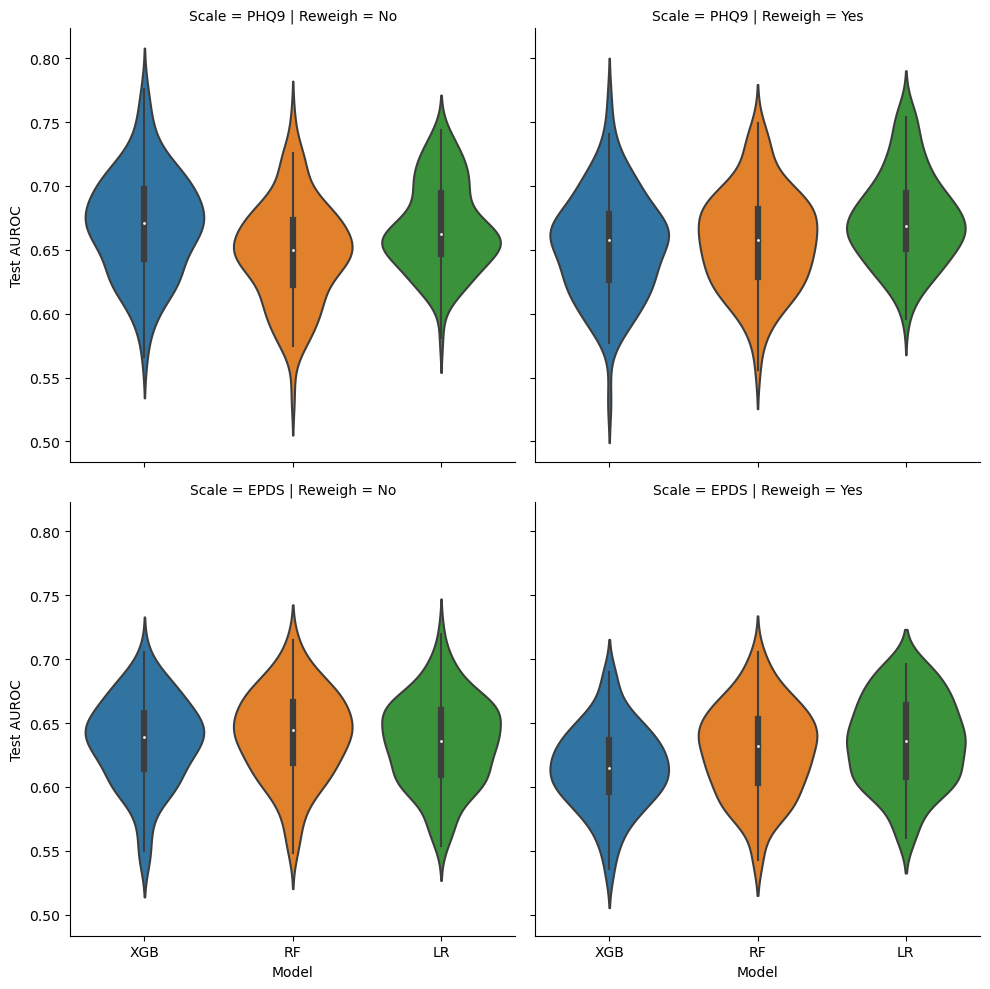

In [34]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test AUC'].notnull()], 
                  x='Model', y='Overall Test AUC', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test AUROC')
plt.savefig('Violin of AUC (boot).pdf',format='pdf',dpi=600)

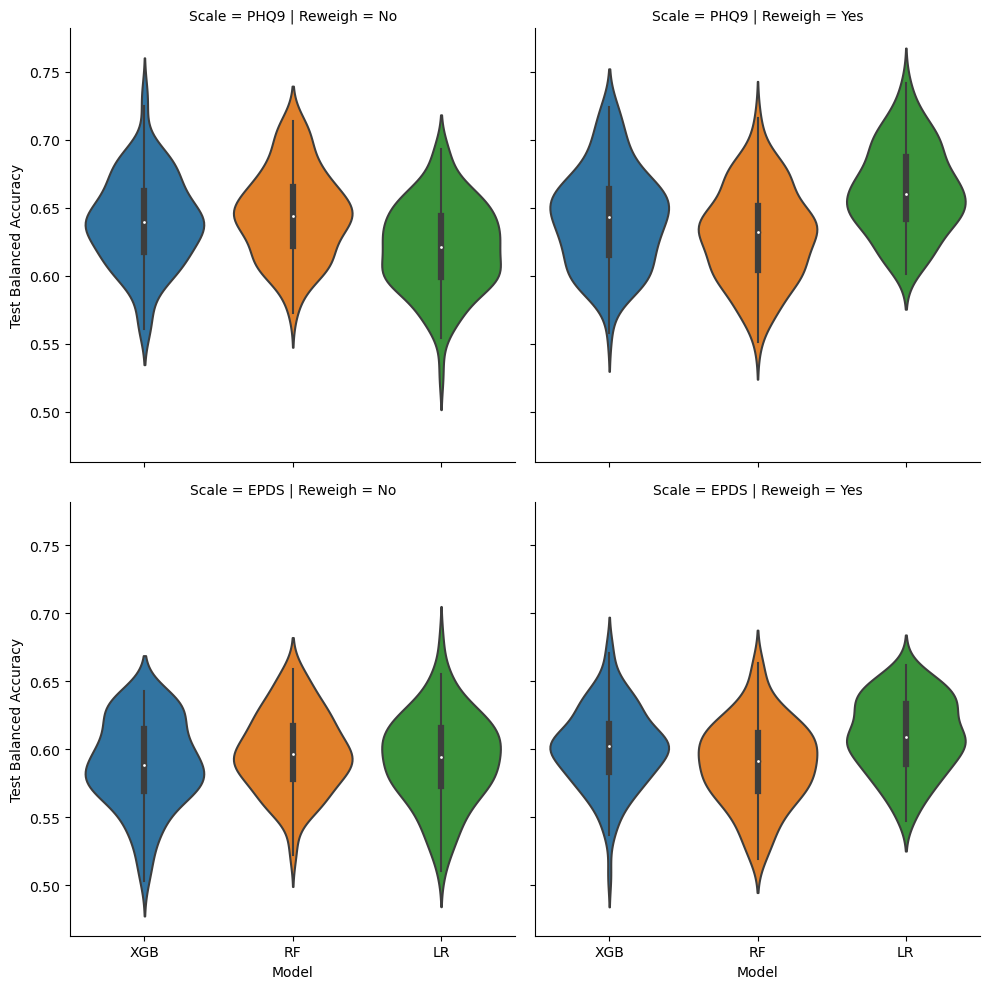

In [35]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test BA'].notnull()], 
                  x='Model', y='Overall Test BA', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test Balanced Accuracy')
plt.savefig('Violin of BA (boot).pdf',format='pdf',dpi=600)

## Cross Validation AUC and Balanced Accuracy

In [37]:
uniq_results = all_cv.iloc[::len(races)]

In [38]:
summary = pd.DataFrame()
summary = pd.DataFrame(uniq_results.groupby(['Model','Reweigh','Scale'])['Overall Test AUC'].agg(['min','max','mean','count','std']))
summary['se'] = summary['std']/np.sqrt(summary['count'])
summary['ci_low'] = summary['mean'] - 1.96*summary['se']
summary['ci_hi'] = summary['mean'] + 1.96*summary['se']
summary

min    max     mean  count       std        se  \
Model Reweigh Scale                                                     
LR    No      EPDS   0.521  0.711  0.61079    100  0.028550  0.002855   
              PHQ9   0.508  0.717  0.61045    100  0.046697  0.004670   
      Yes     EPDS   0.526  0.671  0.60738    100  0.026911  0.002691   
              PHQ9   0.499  0.727  0.60243    100  0.045084  0.004508   
RF    No      EPDS   0.557  0.677  0.62373    100  0.025934  0.002593   
              PHQ9   0.502  0.744  0.63536    100  0.045280  0.004528   
      Yes     EPDS   0.559  0.669  0.61437    100  0.027695  0.002770   
              PHQ9   0.511  0.726  0.62160    100  0.041921  0.004192   
XGB   No      EPDS   0.551  0.677  0.62307    100  0.027071  0.002707   
              PHQ9   0.527  0.733  0.63467    100  0.043928  0.004393   
      Yes     EPDS   0.556  0.659  0.60678    100  0.024136  0.002414   
              PHQ9   0.505  0.699  0.60850    100  0.041826  0.004183   

                       ci_low     ci_hi  
Model Reweigh Scale                      
LR    No      EPDS   0.605194  0.616386  
              PHQ9   0.601297  0.619603  
      Yes     EPDS   0.602105  0.612655  
              PHQ9   0.593594  0.611266  
RF    No      EPDS   0.618647  0.628813  
              PHQ9   0.626485  0.644235  
      Yes     EPDS   0.608942  0.619798  
              PHQ9   0.613384  0.629816  
XGB   No      EPDS   0.617764  0.628376  
              PHQ9   0.626060  0.643280  
      Yes     EPDS   0.602049  0.611511  
              PHQ9   0.600302  0.616698

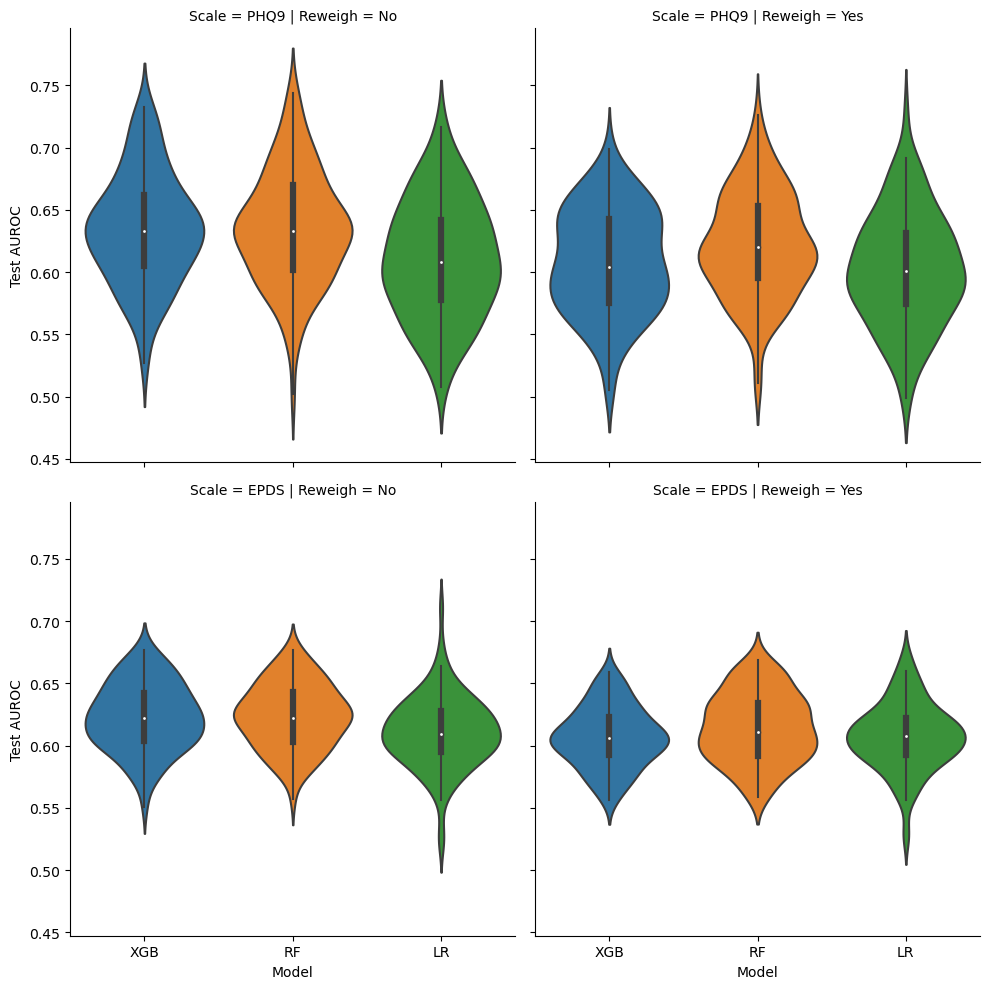

In [39]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test AUC'].notnull()], 
                  x='Model', y='Overall Test AUC', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test AUROC')
plt.savefig('Violin of AUC (cv).pdf',format='pdf',dpi=600)

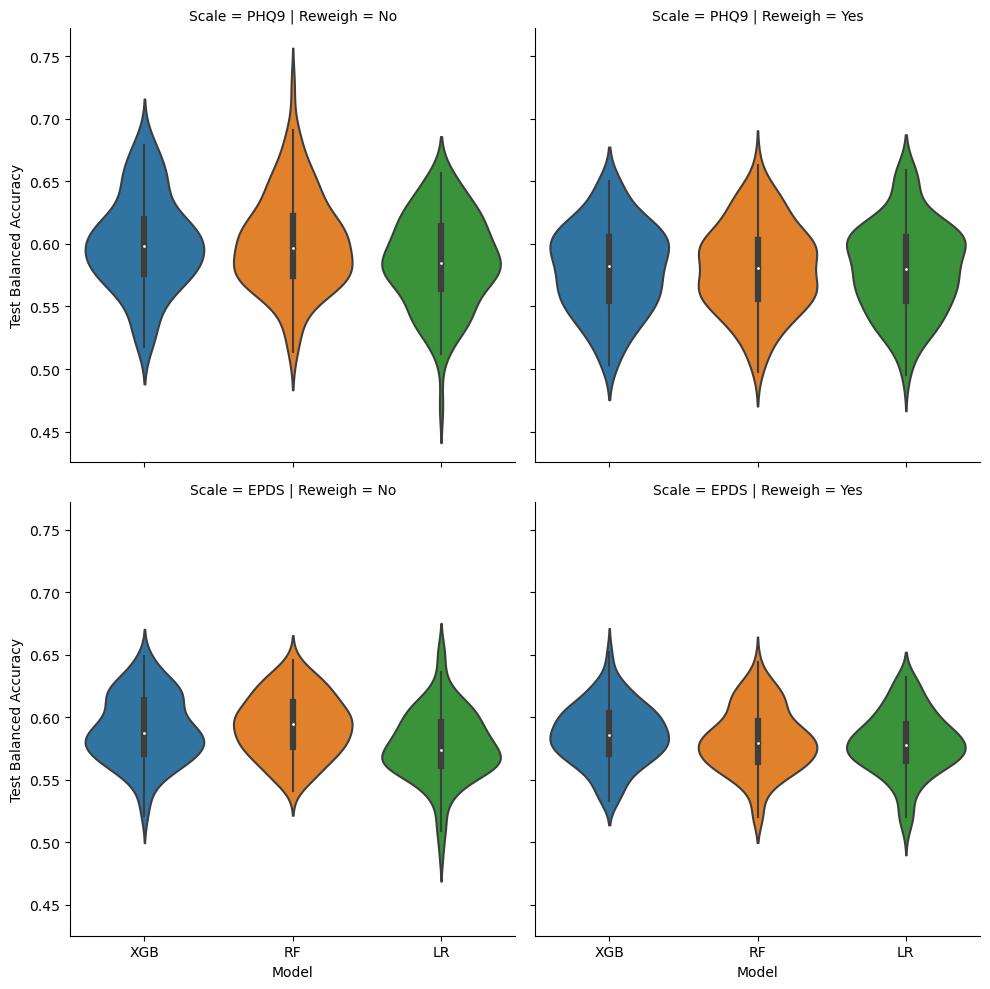

In [40]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test BA'].notnull()], 
                  x='Model', y='Overall Test BA', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test Balanced Accuracy')
plt.savefig('Violin of BA (cv).pdf',format='pdf',dpi=600)

In [80]:
# save this file and output as html
import os
os.system('jupyter nbconvert --to html plotting_and_analyses.ipynb')

[NbConvertApp] Converting notebook plotting_and_analyses.ipynb to html
[NbConvertApp] Writing 1885952 bytes to plotting_and_analyses.html


0